In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from scipy import stats
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mplcol
import functions as func

## Data

### Observations

In [3]:
# Training segments
mydf_train, indices_train = func.getACD_df(outlier_threshold=2.5, DQ='h')
cxx_train, cyy_train = func.getCentroids(indices=indices_train) 
mydf_ex_train, indices_ex_train = func.getACD_df(outlier_threshold=2.5, DQ='hm', extreme=True)
cxx_ex_train, cyy_ex_train = func.getCentroids(indices=indices_ex_train)

# All segments (forcing)
mydf_force, indices_force = func.getACD_df(outlier_threshold=2.5, DQ='all')
cxx_force, cyy_force = func.getCentroids(indices=indices_force) 
mydf_ex_force, indices_ex_force = func.getACD_df(outlier_threshold=2.5, DQ='all', extreme=True)

cxx_ex_force, cyy_ex_force = func.getCentroids(indices=indices_ex_force)
cxx_force_all = np.hstack([cxx_force, cxx_ex_force])
cyy_force_all = np.hstack([cyy_force, cyy_ex_force])

### Model (projections forced by MPI-ESM)

In [7]:
ipath="/work/uo1075/u241292/data_mistral/NCC_data/DKRZ_DOKU/"
scenstr="ssp126"
ifile="eros_ACD-segments_"+scenstr+"_q0.50.nc"
ds = xr.open_dataset(ipath+ifile, decode_times=False)
eros_hist = np.mean(ds['eros'].values[:100,:], axis=0)
eros_s126 = np.mean(ds['eros'].values[-20:,:], axis=0)
seg = ds['seg'].values
time = ds['time'].values

scenstr="ssp245"
ifile="eros_ACD-segments_"+scenstr+"_q0.50.nc"
ds = xr.open_dataset(ipath+ifile, decode_times=False)
eros_s245 = np.mean(ds['eros'].values[-20:,:], axis=0)

scenstr="ssp585"
ifile="eros_ACD-segments_"+scenstr+"_q0.50.nc"
ds = xr.open_dataset(ipath+ifile, decode_times=False)
eros_s585 = np.mean(ds['eros'].values[-20:,:], axis=0)

### Model (forced by ERA20C reanalysis)

In [8]:
ipath="figure_data/"
ifile="eros_ACD-segments_train_ERA20C_lt2.5.nc"
ds = xr.open_dataset(ipath+ifile, decode_times=False)
eros_obs    = ds['eros_obs'].values
eros_ERA20C = ds['eros_ERA20C'].values
eros_ERA20C_2stdUnc = ds['eros_ERA20C_2stdUnc'].values

ipath="figure_data/"
ifile="eros_ACD-segments_train_ERA20C_gt2.5.nc"
ds = xr.open_dataset(ipath+ifile, decode_times=False)
eros_obs_ext    = ds['eros_obs'].values
eros_ERA20C_ext = ds['eros_ERA20C'].values
eros_ERA20C_2stdUnc_ext = ds['eros_ERA20C_2stdUnc'].values

## Figures

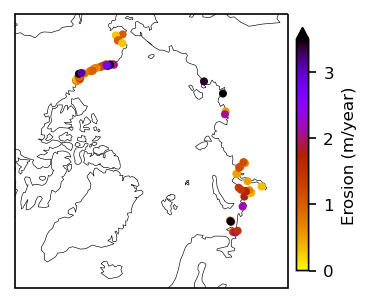

In [12]:
fig = plt.figure(figsize=(2.7, 2.7), dpi=150)
proj=ccrs.NorthPolarStereo()

s=15
fontsize=8
vmax=3.5
vmin=0
res='110m'

ax = fig.add_subplot(111,projection=proj)
ax.set_extent([-180, 180, 63, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, lw=0.3, edgecolor='grey')
m=ax.scatter(cxx_train,cyy_train, c=mydf_train['Eros'].values, s=s, vmin=vmin, vmax=vmax, 
             cmap='gnuplot_r', transform=ccrs.PlateCarree(),zorder=2, edgecolor='none')
m=ax.scatter(cxx_ex_train,cyy_ex_train, c=mydf_ex_train['Eros'].values, s=s, vmin=vmin, vmax=vmax, 
             cmap='gnuplot_r', transform=ccrs.PlateCarree(),zorder=2, edgecolor='none')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.2, 0.03, 0.6])
cbar = fig.colorbar(m, cax=cbar_ax, extend='max')
#cbar.clim(vmin, vmax)
cbar.set_label(label='Erosion (m/year)',fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

#plt.tight_layout()
plt.show()


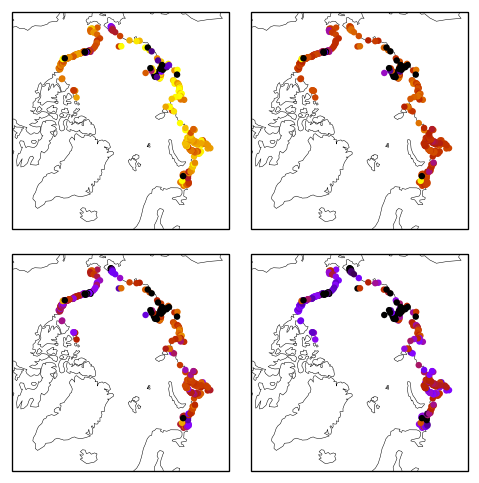

In [13]:
fig = plt.figure(figsize=(4.9, 5), dpi=120)
proj=ccrs.NorthPolarStereo()

s=15
fontsize=8
vmax=3.5
vmin=0
res='110m'


ax = fig.add_subplot(221,projection=proj)
ax.set_extent([-180, 180, 63, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, lw=0.3, edgecolor='grey')
m=ax.scatter(cxx_force_all,cyy_force_all, c=eros_hist, s=s, vmin=vmin, vmax=vmax, 
             cmap='gnuplot_r', transform=ccrs.PlateCarree(),zorder=2, edgecolor='none')

ax = fig.add_subplot(222,projection=proj)
ax.set_extent([-180, 180, 63, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, lw=0.3, edgecolor='grey')
m=ax.scatter(cxx_force_all,cyy_force_all, c=eros_s126, s=s, vmin=vmin, vmax=vmax, 
             cmap='gnuplot_r', transform=ccrs.PlateCarree(),zorder=2, edgecolor='none')

ax = fig.add_subplot(223,projection=proj)
ax.set_extent([-180, 180, 63, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, lw=0.3, edgecolor='grey')
m=ax.scatter(cxx_force_all,cyy_force_all, c=eros_s245, s=s, vmin=vmin, vmax=vmax, 
             cmap='gnuplot_r', transform=ccrs.PlateCarree(),zorder=2, edgecolor='none')

ax = fig.add_subplot(224,projection=proj)
ax.set_extent([-180, 180, 63, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, lw=0.3, edgecolor='grey')
m=ax.scatter(cxx_force_all,cyy_force_all, c=eros_s585, s=s, vmin=vmin, vmax=vmax, 
             cmap='gnuplot_r', transform=ccrs.PlateCarree(),zorder=2, edgecolor='none')

plt.subplots_adjust(wspace=0.10, hspace=0.10)
plt.show()


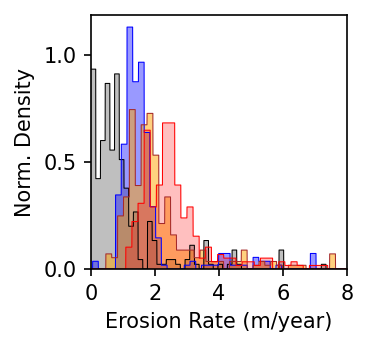

In [14]:
x = np.linspace(0, 10, int(10*1000))

fig = plt.figure(figsize=(2.2, 2.2), dpi=150)
ax = fig.add_subplot(111)

plt.hist(eros_hist, bins=50, alpha=0.5, color='grey', density=True)
h = np.histogram(eros_hist, bins=50)
hist_dist = stats.rv_histogram(h)
plt.plot(x, hist_dist.pdf(x), 'k', lw=0.5)

plt.hist(eros_s126, bins=50, alpha=0.4, color='b', density=True)
h = np.histogram(eros_s126, bins=50)
s126_dist = stats.rv_histogram(h)
plt.plot(x, s126_dist.pdf(x), 'b', lw=0.5)

plt.hist(eros_s245, bins=50, alpha=0.5, color='orange', density=True)
h = np.histogram(eros_s245, bins=50)
s245_dist = stats.rv_histogram(h)
plt.plot(x, s245_dist.pdf(x), 'brown', lw=0.5)

plt.hist(eros_s585, bins=50, alpha=0.25, color='r', density=True)
h = np.histogram(eros_s585, bins=50)
s585_dist = stats.rv_histogram(h)
plt.plot(x, s585_dist.pdf(x), 'r', lw=0.5)

plt.xlim((0,8.0))
plt.yticks(np.arange(0,1.5,0.5),np.arange(0,1.5,0.5))
plt.xlabel('Erosion Rate (m/year)')
plt.ylabel('Norm. Density')
plt.show()


ValueError: 'yerr' must not contain negative values

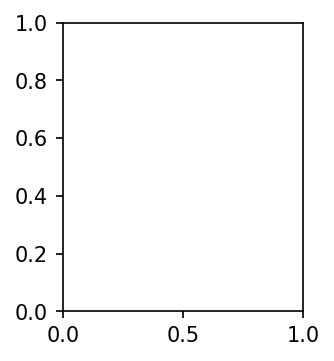

In [15]:
def rmse(x,y):
    '''
    Root Mean Square Error
    '''
    import numpy as np
    return np.sqrt(np.nansum((x-y)**2)/len(x))

viridis = cm.get_cmap('gnuplot_r', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([125/256, 256/256, 256/256, 0])
newcolors[:1, :] = pink
cmap = ListedColormap(newcolors)

fig = plt.figure(figsize=(4.55,2.5), dpi=150)
ax = fig.add_subplot(121)

plt.errorbar(eros_obs, eros_ERA20C, yerr=eros_ERA20C_2stdUnc, xerr=None, ls='', ecolor='darkorange', elinewidth=0.5)
plt.scatter(eros_obs, eros_ERA20C, alpha=0.8, cmap=cmap, c=eros_obs, vmin=vmin, vmax=vmax, s=15)
r = np.corrcoef(eros_obs, eros_ERA20C)[0,1]
rms = rmse(eros_obs, eros_ERA20C)
plt.yticks([0,1,2,3],[0,1,2,3])
plt.xticks([0,1,2,3],[0,1,2,3])
plt.plot(np.arange(-3,4), np.arange(-3,4), ls='--', lw=0.5, c='grey')
plt.xlabel('Observations (m/year)'); plt.ylabel('Model (m/year)')
plt.xlim((0, 2.7)); plt.ylim((0, 2.7))
plt.text(0.05,2.5,'$r=%.2f$ ($p<0.01$)'%r, fontsize=8)
plt.text(0.05,2.3,'$RMSE=%.2f$ m/year'%(rms), fontsize=8)

ax = fig.add_subplot(122)

plt.errorbar(eros_obs_ext, eros_ERA20C_ext, yerr=eros_ERA20C_2stdUnc_ext, xerr=None, ls='', ecolor='darkviolet', elinewidth=0.5)
plt.scatter(eros_obs_ext, eros_ERA20C_ext, alpha=0.8, cmap=cmap, c=eros_obs_ext, vmin=vmin, vmax=vmax, s=15)
r = np.corrcoef(eros_obs_ext, eros_ERA20C_ext)[0,1]
rms = rmse(eros_obs_ext, eros_ERA20C_ext)
plt.yticks([3,6,9],[3,6,9], fontsize=9)
plt.xticks([3,6,9],[3,6,9], fontsize=9)
plt.plot(np.arange(-3,14), np.arange(-3,14), ls='--', lw=0.5, c='grey')
plt.xlabel('Observations (m/year)'); plt.ylabel('Model (m/year)')
plt.xlim((1.7, 10)); plt.ylim((1.7,10))
plt.text(2.1,9.2,'$r=%.2f$ ($p<0.01$)'%r, fontsize=8)
plt.text(3.84,1.9,'$RMSE=%.2f$ m/yr'%(rms), fontsize=8)

plt.tight_layout()
plt.show()